In [1]:
#pip install tensorflow
#pip install keras
#pip install seaborn
#pip install numpy
#pip install matplotlib
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
def plt_dynamic(x,vy,ty,ax,colors=['b']):
    ax.plot(x,vy,'b',label='Validation Loss')
    ax.plot(x,vy,'r',label='Training Loss')
    plt.legend()
    plt.grid()

In [4]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [6]:
print("Number of training examples= ",X_train.shape[0],'and each image is of shape ',X_train.shape[1])
print("Number of test examples=",X_test.shape[0],'and each image is of shape',X_test.shape[1])

Number of training examples=  60000 and each image is of shape  784
Number of test examples= 10000 and each image is of shape 784


In [7]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
print("Class label of first image:",y_train[0])
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)
print('After converting the output into a vector: ',Y_train[0])

Class label of first image: 5
After converting the output into a vector:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
output_dim=10
input_dim=X_train.shape[1]
batch_size=128
np_epoch=20

In [12]:
model = Sequential()
model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [14]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=np_epoch,
    verbose=1,
    validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 1.2944 - accuracy: 0.6926 - val_loss: 0.8119 - val_accuracy: 0.8347
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.7160 - accuracy: 0.8425 - val_loss: 0.6058 - val_accuracy: 0.8631
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5858 - accuracy: 0.8613 - val_loss: 0.5239 - val_accuracy: 0.8747
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5239 - accuracy: 0.8701 - val_loss: 0.4782 - val_accuracy: 0.8826
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4863 - accuracy: 0.8767 - val_loss: 0.4487 - val_accuracy: 0.8872
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4605 - accuracy: 0.8808 - val_loss: 0.4275 - val_accuracy: 0.8912
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4415 - accuracy: 0.8843 - val_loss: 0.4112 - val_accuracy: 0.8947
Epoch 

In [15]:
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Score:",score[0])
print("Test Accurancy",score[1])

Test Score: 0.3354264795780182
Test Accurancy 0.909600019454956


In [16]:
model_sigmoid=Sequential()
model_sigmoid.add(Dense(512,activation="sigmoid",input_shape=(input_dim,)))
model_sigmoid.add(Dense(128,activation="sigmoid"))
model_sigmoid.add(Dense(output_dim,activation="softmax"))
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])
history = model_sigmoid.fit(X_train,Y_train,batch_size=batch_size,epochs=np_epoch,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 2.2739 - accuracy: 0.2086 - val_loss: 2.2307 - val_accuracy: 0.3562
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 2.1876 - accuracy: 0.4590 - val_loss: 2.1336 - val_accuracy: 0.5474
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 2.0748 - accuracy: 0.5827 - val_loss: 1.9982 - val_accuracy: 0.5238
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 1.9132 - accuracy: 0.6288 - val_loss: 1.8032 - val_accuracy: 0.6747
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 1.6986 - accuracy: 0.6732 - val_loss: 1.5677 - val_accuracy: 0.6900
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 1.4640 - accuracy: 0.7053 - val_loss: 1.3385 - val_accuracy: 0.7249
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 1.2535 - accuracy: 0.7358 - val_loss: 1.1482 - val_accuracy: 0.7615

<IPython.core.display.Javascript object>


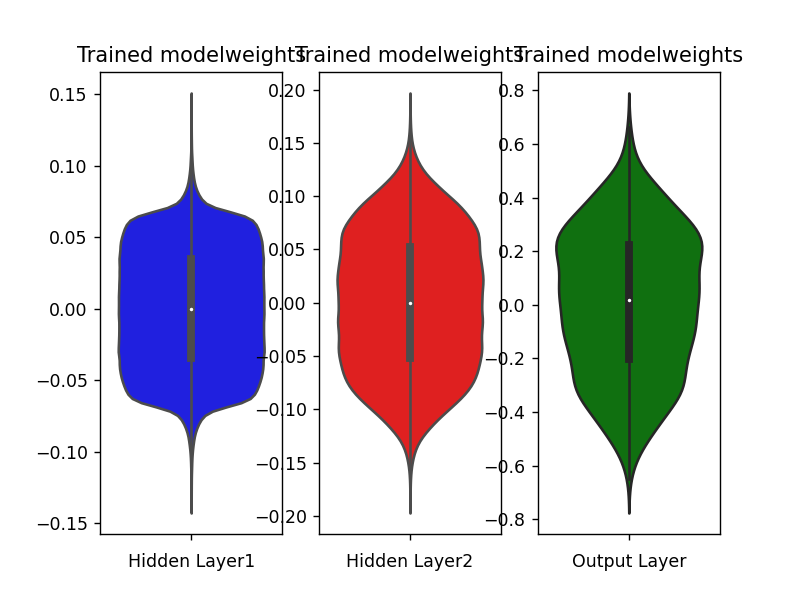

C:\Users\Sadiq\AppData\Local\Temp\ipykernel_26616\251596265.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


In [18]:
w_after = model_sigmoid.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matricesafteremodeltrained")
plt.subplot(1,3,1)
plt.title("Trained modelweights")
ax = sns.violinplot(y=h1_w,color="b")
plt.xlabel("Hidden Layer1")
plt.subplot(1,3,2)
plt.title("Trained modelweights")
ax = sns.violinplot(y=h2_w,color="r")
plt.xlabel("Hidden Layer2")
plt.subplot(1,3,3)
plt.title("Trained modelweights")
ax = sns.violinplot(y=out_w,color="g")
plt.xlabel("Output Layer")
plt.show()